In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
pd.options.plotting.backend = "plotly"

In [58]:
amount = 1200
start_age = 65
end_age = 100

In [59]:
cum_amounts = []
total_amount = 0
for i in range(start_age, end_age+1):
    total_amount += amount
    cum_amounts.append(total_amount) 

In [32]:
df = pd.DataFrame({str(start_age):cum_amounts}, index=range(start_age, end_age+1))
df.plot(labels=dict(index="age", value="100M", variable="option"))

In [63]:
age_list = []
cum_amount_list = []

for i in range(-5, 0):
    new_start_age = start_age + i
    annual_amount = amount * (1- 0.06 * i*(-1))
    print(annual_amount)
    cum_amount = []
    total_amount = 0
    for i in range(new_start_age, end_age+1):
        total_amount += annual_amount
        cum_amount.append(total_amount)
    age_list.append(range(new_start_age, end_age+1))
    cum_amount_list.append(cum_amount)

840.0
912.0
984.0000000000001
1056.0
1128.0


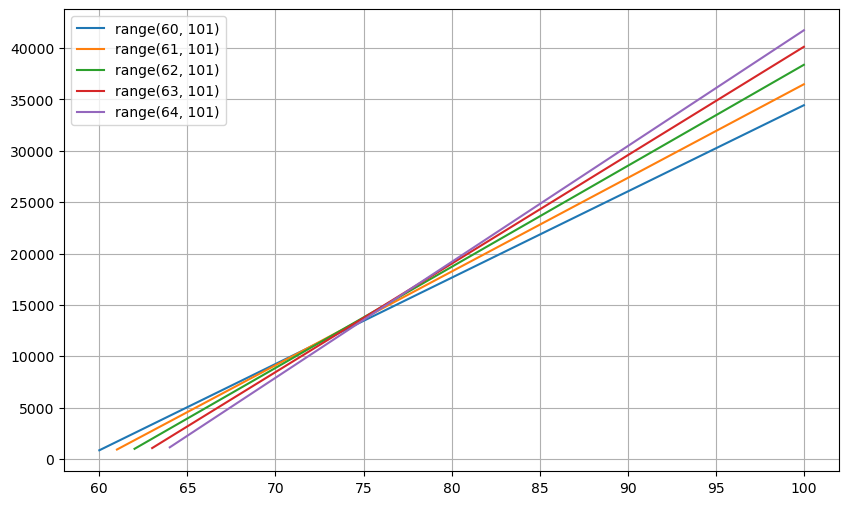

In [65]:
plt.figure(figsize=(10, 6))
for i in range(len(age_list)):
    plt.plot(age_list[i], cum_amount_list[i], label=str(age_list[i]))
plt.legend()
plt.grid()
plt.show()

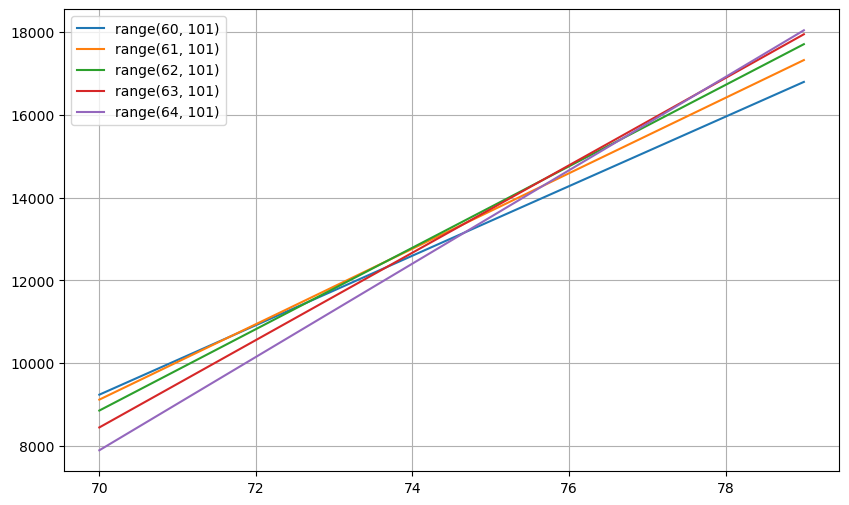

In [68]:
S = 
plt.figure(figsize=(10, 6))
for i in range(len(age_list)):
    plt.plot(age_list[i][age_list[i].index(70):age_list[i].index(80)], 
             cum_amount_list[i][age_list[i].index(70):age_list[i].index(80)], 
             label=str(age_list[i]))
plt.legend()
plt.grid()
plt.show()

In [67]:
age_list

ValueError: 70 is not in list